# Final Capstone - Harvard and Duke Forests environmental growing conditions 






### Overview: 

This project is a statistical analysis of Harvard and Duke forests environmental conditions. These two forests are approximately 700 miles from each other on the eastern seaboard. This dataset is of interest due to the rapidly changing climatic conditions, digging into the experimental environmenal conditions can provide key insights into future outcomes of these two forest. This data and analysis is very important for US Forest Service and Conservation agencies to understand as they asses and make predictions about the future of our forests. 




### Goals: 

1. Combine 3 datasets into 1 
2. Predict difference between Duke and Harvard forests
3. Model the relationship between air temperature and PAR
4. Use classification models to predict treatment changes
5. Use Random Forest to predict Tree Species with treatments ('Only for Harvard forest')
6. PCA model of the dataset - how is it related or different
7. Time series modeling of Air temperature and photosysnthetically active radiation 

##### Loading Modules 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import chardet
import codecs

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import folium
from folium import plugins
from scipy import stats

%matplotlib inline
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Loading in datasets for Harvard and Duke forest 

###### The havard_forest_complete.csv file is a joined file of hf199-01: hf environment and hf199-03: hf growth. To see the code on the merge see: Harvard Forest and Plant ID merged.ipynb 


In [4]:
# Harvard Forest 
df = pd.read_csv('/Users/mille/Desktop/Final Capstone/havard_forest_complete.csv', low_memory=False)
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (1407177, 18)


In [5]:
# Duke Forest 
df1 = pd.read_csv('/Users/mille/Desktop/Final Capstone/hf199-04-df-env.csv', low_memory=False)
print('Dataframe dimensions:', df1.shape)

Dataframe dimensions: (750768, 15)


In [6]:
df.head()

,Unnamed: 0,date,Species,Tag,Chamber,site,year,month,day,hour,chamber,treatment,warming,AT,Q,Rh,SM,ST
0,0,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,1,1,S,5,11.000,0.00,NaN,0.17,13.240000
1,1,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,2,1,S,5,11.040,1.69,NaN,0.17,13.000000
2,2,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,3,1,S,5,10.415,0.00,NaN,0.17,12.836667
3,3,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,4,1,S,5,9.820,-10.12,NaN,0.17,12.653333
4,4,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,5,1,S,5,9.860,8.44,NaN,0.17,12.380000


In [7]:
df.drop(columns=['Unnamed: 0'])

,date,Species,Tag,Chamber,site,year,month,day,hour,chamber,treatment,warming,AT,Q,Rh,SM,ST
0,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,1,1,S,5,11.000000,0.000,NaN,0.170,13.240000
1,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,2,1,S,5,11.040000,1.690,NaN,0.170,13.000000
2,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,3,1,S,5,10.415000,0.000,NaN,0.170,12.836667
3,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,4,1,S,5,9.820000,-10.120,NaN,0.170,12.653333
4,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,5,1,S,5,9.860000,8.440,NaN,0.170,12.380000
5,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,6,1,S,5,8.600000,0.000,NaN,0.170,12.286667
6,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,7,1,S,5,9.535000,28.690,NaN,0.170,12.070000
7,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,8,1,S,5,12.430000,75.940,NaN,0.170,12.203333
8,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,9,1,S,5,16.560000,77.610,NaN,0.170,12.603333
9,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,10,1,S,5,18.970000,674.900,NaN,0.170,13.250000


#### Adding datetime to Harvard Forest dataset 

In [8]:
df['date']  = pd.to_datetime(df[['year', 'month', 'day']])

In [9]:
df.drop(columns=['Unnamed: 0'])

,date,Species,Tag,Chamber,site,year,month,day,hour,chamber,treatment,warming,AT,Q,Rh,SM,ST
0,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,1,1,S,5,11.000000,0.000,NaN,0.170,13.240000
1,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,2,1,S,5,11.040000,1.690,NaN,0.170,13.000000
2,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,3,1,S,5,10.415000,0.000,NaN,0.170,12.836667
3,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,4,1,S,5,9.820000,-10.120,NaN,0.170,12.653333
4,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,5,1,S,5,9.860000,8.440,NaN,0.170,12.380000
5,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,6,1,S,5,8.600000,0.000,NaN,0.170,12.286667
6,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,7,1,S,5,9.535000,28.690,NaN,0.170,12.070000
7,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,8,1,S,5,12.430000,75.940,NaN,0.170,12.203333
8,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,9,1,S,5,16.560000,77.610,NaN,0.170,12.603333
9,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,10,1,S,5,18.970000,674.900,NaN,0.170,13.250000


#### Understanding the Harvad Forest - environmental variables 

year: year
month: month
day: day of month
time: hour of day
chamber: chamber number (1-12)
treatment: light treatment
G: chamber in open gap
S: chamber under closed canopy
warming: warming treatment
3: 3 degrees C
5: 5 degrees C
A: ambient
C: control
AT: air temperature (unit: celsius / missing value: NA)
Q: photosynthetically active radiation (unit: micromolePerMeterSquaredPerSecond / missing value: NA)
Rh: relative humidity (%) (unit: dimensionless / missing value: NA)
SM: volumetric water content (fractional) (unit: dimensionless / missing value: NA)
ST: soil temperature at 5cm depth (unit: celsius / missing value: NA)



#### Q: photosynthetically active radiation (unit: micromolePerMeterSquaredPerSecond/missing value:NA)

Why is Photosynthetically Active Radiation Important?

Photosynthetically Active Radiation is needed for photosynthesis and plant growth. Higher PAR promotes plant growth, and monitoring monitoring PAR is important to ensure plants are receiving adequate light for this process.

PAR values range from 0 to 3,000 millimoles per square meter. At night, PAR is zero. During mid-day in the summer, PAR often reaches 2,000 to 3,000 millimoles per square meter.

PAR of 0 is Night

Mid-day in summer PAR 2,000 to 3,000

https://s.campbellsci.com/documents/ca/manuals/li190sb_man.pdf

https://curiousplant.com/light-carnivorous-plants-part-2/

In [10]:
df['Q'].describe()

count    1.099241e+06
mean     9.723897e+01
std      3.367903e+02
min     -1.753000e+03
25%      0.000000e+00
50%      5.033000e+00
75%      7.214000e+01
max      4.410000e+03
Name: Q, dtype: float64

In [11]:
df.groupby('hour')
df.groupby('hour').get_group(23).max()

Unnamed: 0                1407175
date          2011-11-15 00:00:00
Species                      unkn
Tag                         20011
Chamber                     S12_C
site                           HF
year                         2011
month                          11
day                            30
hour                           23
chamber                        12
treatment                       S
warming                         C
AT                          28.65
Q                            3466
Rh                          104.2
SM                          0.303
ST                        27.6033
dtype: object

In [12]:
filtered_data = df[df.hour == 1]

In [13]:
filtered_data = df[df.Q < 0 ]

In [14]:
filtered_data

,Unnamed: 0,date,Species,Tag,Chamber,site,year,month,day,hour,chamber,treatment,warming,AT,Q,Rh,SM,ST
3,3,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,4,1,S,5,9.820000,-10.120,NaN,0.170,12.653333
26,26,2010-04-21,acru,1.0,S01_5,HF,2010,4,21,3,1,S,5,13.420000,-3.370,NaN,0.170,12.680000
45,45,2010-04-21,acru,1.0,S01_5,HF,2010,4,21,22,1,S,5,17.765000,-10.120,NaN,0.160,15.325000
67,67,2010-04-29,acru,1.0,S01_5,HF,2010,4,29,20,1,S,5,12.175000,-8.430,NaN,0.160,13.280000
72,72,2010-04-30,acru,1.0,S01_5,HF,2010,4,30,1,1,S,5,7.855000,-5.060,NaN,0.150,12.100000
75,75,2010-04-30,acru,1.0,S01_5,HF,2010,4,30,4,1,S,5,8.710000,-11.810,NaN,0.150,12.155000
99,99,2010-05-17,acru,1.0,S01_5,HF,2010,5,17,4,1,S,5,12.140000,-3.372,NaN,0.137,15.860000
205,205,2010-06-16,acru,1.0,S01_5,HF,2010,6,16,23,1,S,5,21.155000,-3.374,NaN,0.128,19.766667
209,209,2010-07-07,acru,1.0,S01_5,HF,2010,7,7,3,1,S,5,27.945000,-5.059,NaN,0.073,25.263333
535,535,2011-10-13,acru,5.0,G09_5,HF,2011,10,13,2,9,G,5,13.770000,-1.678,93.80,0.166,18.240000


In [15]:
df.sort_values('month', axis=0, ascending=False)

,Unnamed: 0,date,Species,Tag,Chamber,site,year,month,day,hour,chamber,treatment,warming,AT,Q,Rh,SM,ST
703588,703588,2010-11-29,magr,3996.0,S04_5,HF,2010,11,29,8,4,S,5,3.4955,5.034,NaN,0.153,7.341333
620649,620649,2011-11-08,quru,3608.0,S03_3,HF,2011,11,8,13,3,S,3,18.1900,105.700,60.02,0.153,10.170000
620660,620660,2011-11-08,quru,3608.0,S03_3,HF,2011,11,8,24,3,S,3,13.5900,0.000,85.50,0.152,11.110000
620659,620659,2011-11-08,quru,3608.0,S03_3,HF,2011,11,8,23,3,S,3,13.6200,0.000,85.90,0.152,11.210000
620658,620658,2011-11-08,quru,3608.0,S03_3,HF,2011,11,8,22,3,S,3,13.4500,0.000,85.50,0.152,11.230000
620657,620657,2011-11-08,quru,3608.0,S03_3,HF,2011,11,8,21,3,S,3,13.7300,-1.678,83.60,0.152,11.360000
620656,620656,2011-11-08,quru,3608.0,S03_3,HF,2011,11,8,20,3,S,3,14.0800,0.000,83.60,0.152,11.500000
620655,620655,2011-11-08,quru,3608.0,S03_3,HF,2011,11,8,19,3,S,3,14.8800,0.000,81.60,0.152,11.620000
620654,620654,2011-11-08,quru,3608.0,S03_3,HF,2011,11,8,18,3,S,3,16.8800,11.740,71.36,0.152,11.720000
620653,620653,2011-11-08,quru,3608.0,S03_3,HF,2011,11,8,17,3,S,3,18.0600,23.490,65.67,0.152,11.550000


#### Adding a new feature - ppfd (Photosynthetic Photon Flux Density) 

Created by using the Q: photosynthetically active radiation * Avogadro's number 

In [16]:
def calculate_ppfd(Q):
    ppfd = Q * (6.0221409**23) 
    return ppfd

df['ppfd'] = df.Q.apply(calculate_ppfd)

In [17]:
df.describe()

,Unnamed: 0,Tag,year,month,day,hour,chamber,AT,Q,Rh,SM,ST,ppfd
count,1.407177e+06,1.407177e+06,1.407177e+06,1.407177e+06,1.407177e+06,1.407177e+06,1.407177e+06,1.378532e+06,1.099241e+06,649872.000000,1.353387e+06,1.377572e+06,1.099241e+06
mean,7.035880e+05,6.488845e+03,2.010447e+03,8.398515e+00,1.662539e+01,1.254754e+01,4.715829e+00,1.492016e+01,9.723897e+01,82.969005,1.377218e-01,1.471537e+01,8.358173e+19
std,4.062172e+05,3.720405e+03,5.266105e-01,2.324370e+00,8.881952e+00,6.915155e+00,2.859527e+00,7.627477e+00,3.367903e+02,14.621991,5.109602e-02,5.417428e+00,2.894880e+20
min,0.000000e+00,1.000000e+00,2.009000e+03,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.291667e+00,-1.753000e+03,11.280000,3.000000e-02,1.097000e+00,-1.506791e+21
25%,3.517940e+05,2.957000e+03,2.010000e+03,6.000000e+00,8.000000e+00,7.000000e+00,2.000000e+00,9.550000e+00,0.000000e+00,72.710000,1.090000e-01,1.087667e+01,0.000000e+00
50%,7.035880e+05,3.996000e+03,2.010000e+03,9.000000e+00,1.800000e+01,1.300000e+01,4.000000e+00,1.467000e+01,5.033000e+00,84.100000,1.410000e-01,1.459000e+01,4.326114e+18
75%,1.055382e+06,1.019000e+04,2.011000e+03,1.000000e+01,2.600000e+01,1.900000e+01,7.000000e+00,2.008000e+01,7.214000e+01,96.500000,1.660000e-01,1.871000e+01,6.200791e+19
max,1.407176e+06,2.001100e+04,2.011000e+03,1.100000e+01,3.000000e+01,2.400000e+01,1.200000e+01,4.000000e+01,4.410000e+03,104.200000,4.749000e+00,3.017000e+01,3.790614e+21


#### Add feature - CO2 uptake and CO2 release are both related to Q. 

These are boolean values created by a conditional statement. 

When Q is positive number CO2_uptake will read TRUE. 
When Q is negative number CO2_release will read TRUE. 

In [18]:
df['CO2_uptake'] = np.where(df['Q']>=0, True, False) #during the day CO2 into the plant 

In [19]:
df['CO2_release'] = np.where(df['Q']<=0, True, False) #at night CO2 is being released 

In [20]:
df.isnull().sum().sum() #total na's 


1485217

#### Large number of missing values within the environmental variables. 

1. Use a groupby method and fillna by the monthly mean per environmental variable. 
2. This likely will introduce variance into the models. However, by doing this I hope to reduce the bias and minize the variance. 

In [21]:
df.isnull().sum()

Unnamed: 0          0
date                0
Species             0
Tag                 0
Chamber             0
site                0
year                0
month               0
day                 0
hour                0
chamber             0
treatment           0
warming             0
AT              28645
Q              307936
Rh             757305
SM              53790
ST              29605
ppfd           307936
CO2_uptake          0
CO2_release         0
dtype: int64

In [23]:
df['Q'] = df.groupby('month').fillna((df['Q'].mean()))


In [24]:
df.head()

,Unnamed: 0,date,Species,Tag,Chamber,site,year,month,day,hour,chamber,treatment,warming,AT,Q,Rh,SM,ST,ppfd,CO2_uptake,CO2_release
0,0,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,1,1,S,5,11.000,11,NaN,0.17,13.240000,0.000000e+00,True,True
1,1,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,2,1,S,5,11.040,11.04,NaN,0.17,13.000000,1.452639e+18,True,False
2,2,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,3,1,S,5,10.415,10.415,NaN,0.17,12.836667,0.000000e+00,True,True
3,3,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,4,1,S,5,9.820,9.82,NaN,0.17,12.653333,-8.698643e+18,False,True
4,4,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,5,1,S,5,9.860,9.86,NaN,0.17,12.380000,7.254599e+18,True,False


In [25]:
g = df.groupby('month').mean()
g


,Unnamed: 0,Tag,year,day,hour,chamber,AT,Rh,SM,ST,ppfd,CO2_uptake,CO2_release
month,,,,,,,,,,,,,
4,782598.589151,7171.094086,2010.377056,21.686305,12.500000,4.324144,10.172442,98.227922,0.171904,9.693864,1.093868e+20,0.828609,0.309740
5,730058.465704,6789.717911,2010.523094,18.071968,12.880173,4.469591,18.147404,75.709980,0.150396,15.638012,1.385512e+20,0.925287,0.316209
6,712563.088452,6567.208095,2010.589584,14.231248,12.500000,4.803566,16.897422,80.468906,0.140276,16.886747,1.229476e+20,0.927399,0.292799
7,667784.096889,6097.067032,2010.555839,17.560938,12.500000,4.830189,24.346725,86.667199,0.095586,22.218747,8.950016e+19,0.936788,0.336404
8,645180.462294,5673.751460,2010.000000,2.000000,12.500000,4.360064,21.211299,NaN,0.093266,20.939996,7.685245e+19,0.982984,0.361922
9,700802.449504,6412.761079,2010.269141,20.296936,12.500000,4.716012,20.011285,79.378980,0.103312,18.896966,9.807493e+19,0.340196,0.162236
10,690671.366376,6404.501565,2010.516896,15.745448,12.500000,4.827679,12.383252,87.149338,0.145720,14.058017,2.645227e+19,0.632555,0.363537
11,693926.832879,6457.635298,2010.508231,13.853479,12.500000,4.880582,7.798483,79.624099,0.159117,8.219781,7.344124e+19,0.960762,0.512400


In [26]:
df['Rh'] = df.groupby('month').fillna((df['Rh'].mean()))
df['AT'] = df.groupby('month').fillna((df['AT'].mean()))
df['SM'] = df.groupby('month').fillna((df['SM'].mean()))
df['ST'] = df.groupby('month').fillna((df['ST'].mean()))
df['ppfd'] = df.groupby('month').fillna((df['ppfd'].mean()))


In [27]:
df.drop(columns=['Unnamed: 0'])

,date,Species,Tag,Chamber,site,year,month,day,hour,chamber,treatment,warming,AT,Q,Rh,SM,ST,ppfd,CO2_uptake,CO2_release
0,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,1,1,S,5,11,11,11,11,11,11,True,True
1,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,2,1,S,5,11.04,11.04,11.04,11.04,11.04,11.04,True,False
2,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,3,1,S,5,10.415,10.415,10.415,10.415,10.415,10.415,True,True
3,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,4,1,S,5,9.82,9.82,9.82,9.82,9.82,9.82,False,True
4,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,5,1,S,5,9.86,9.86,9.86,9.86,9.86,9.86,True,False
5,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,6,1,S,5,8.6,8.6,8.6,8.6,8.6,8.6,True,True
6,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,7,1,S,5,9.535,9.535,9.535,9.535,9.535,9.535,True,False
7,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,8,1,S,5,12.43,12.43,12.43,12.43,12.43,12.43,True,False
8,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,9,1,S,5,16.56,16.56,16.56,16.56,16.56,16.56,True,False
9,2010-04-15,acru,1.0,S01_5,HF,2010,4,15,10,1,S,5,18.97,18.97,18.97,18.97,18.97,18.97,True,False


Now we have a complete dataset without any nulls. 

In [28]:
df.isnull().sum()

Unnamed: 0     0
date           0
Species        0
Tag            0
Chamber        0
site           0
year           0
month          0
day            0
hour           0
chamber        0
treatment      0
warming        0
AT             0
Q              0
Rh             0
SM             0
ST             0
ppfd           0
CO2_uptake     0
CO2_release    0
dtype: int64

### Duke Forest dataset 

In [29]:
df1.head()

,site,year,times,month,day,JD,JD2009,dayFraction,chamber,treatment,AT,Q,Rh,SM,ST
0,DF,2009,125.54,5,6,-240,125,0.54,1,G,24.226667,450.6,NaN,0.239,21.036667
1,DF,2009,125.54,5,6,-240,125,0.54,2,G,24.513333,502.7,NaN,0.232,20.866667
2,DF,2009,125.54,5,6,-240,125,0.54,3,G,24.070000,416.9,NaN,0.262,19.590000
3,DF,2009,125.54,5,6,-240,125,0.54,4,G,24.443333,526.2,NaN,0.237,20.415000
4,DF,2009,125.54,5,6,-240,125,0.54,5,G,24.305000,385.0,NaN,0.212,19.655000


Adding datetime stamp 

In [30]:
df1['date']  = pd.to_datetime(df1[['year', 'month', 'day']])


In [31]:
df1.head() #Duke

,site,year,times,month,day,JD,JD2009,dayFraction,chamber,treatment,AT,Q,Rh,SM,ST,date
0,DF,2009,125.54,5,6,-240,125,0.54,1,G,24.226667,450.6,NaN,0.239,21.036667,2009-05-06
1,DF,2009,125.54,5,6,-240,125,0.54,2,G,24.513333,502.7,NaN,0.232,20.866667,2009-05-06
2,DF,2009,125.54,5,6,-240,125,0.54,3,G,24.070000,416.9,NaN,0.262,19.590000,2009-05-06
3,DF,2009,125.54,5,6,-240,125,0.54,4,G,24.443333,526.2,NaN,0.237,20.415000,2009-05-06
4,DF,2009,125.54,5,6,-240,125,0.54,5,G,24.305000,385.0,NaN,0.212,19.655000,2009-05-06


Large number of missing null values in Duke Forest dataset as well. 

Using the same approach as above. Taking the groupby of month and fillna per environmental variable with a mean. 

In [32]:
df1.isnull().sum()

site                0
year                0
times               0
month               0
day                 0
JD                  0
JD2009              0
dayFraction         0
chamber             0
treatment           0
AT              77654
Q              158106
Rh             750768
SM                162
ST              77614
date                0
dtype: int64

In [33]:
df1['AT'] = df1.groupby('month').fillna((df1['AT'].mean()))
df1['Q'] = df1.groupby('month').fillna((df1['Q'].mean()))
df1['Rh'] = df1.groupby('month').fillna((df1['Rh'].mean()))
df1['SM'] = df1.groupby('month').fillna((df1['SM'].mean()))
df1['ST'] = df1.groupby('month').fillna((df1['ST'].mean()))


In [34]:
df1.isnull().sum()

site           0
year           0
times          0
month          0
day            0
JD             0
JD2009         0
dayFraction    0
chamber        0
treatment      0
AT             0
Q              0
Rh             0
SM             0
ST             0
date           0
dtype: int64

In [35]:
df1['CO2_uptake'] = np.where(df1['Q']>=0, True, False) #during the day CO2 into the plant 
df1['CO2_release'] = np.where(df1['Q']<=0, True, False) #at night CO2 is being released 

In [36]:
def calculate_ppfd(Q):
    ppfd = Q * (6.0221409**23) 
    return ppfd

df1['ppfd'] = df1.Q.apply(calculate_ppfd)

In [37]:
df1.isnull().sum()

site           0
year           0
times          0
month          0
day            0
JD             0
JD2009         0
dayFraction    0
chamber        0
treatment      0
AT             0
Q              0
Rh             0
SM             0
ST             0
date           0
CO2_uptake     0
CO2_release    0
ppfd           0
dtype: int64

In [38]:
df1.dtypes

site                   object
year                    int64
times                 float64
month                   int64
day                     int64
JD                      int64
JD2009                  int64
dayFraction           float64
chamber                 int64
treatment              object
AT                     object
Q                      object
Rh                     object
SM                     object
ST                     object
date           datetime64[ns]
CO2_uptake               bool
CO2_release              bool
ppfd                  float64
dtype: object

In [39]:
df.dtypes

Unnamed: 0              int64
date           datetime64[ns]
Species                object
Tag                   float64
Chamber                object
site                   object
year                    int64
month                   int64
day                     int64
hour                    int64
chamber                 int64
treatment              object
warming                object
AT                     object
Q                      object
Rh                     object
SM                     object
ST                     object
ppfd                   object
CO2_uptake               bool
CO2_release              bool
dtype: object

##### Renaming dataframes so that I can use them later. But preparing to merge datasets. 

In [40]:
df2 = df1.drop(columns=['times', 'JD', 'JD2009', 'dayFraction'])# Duke Forest 

df3 = df.drop(columns=['Tag', 'Species', 'hour', 'warming']) # Harvard Forest 

## Combining Harvard and Duke forest datasets 

In [41]:
HfDf = pd.concat([df2, df3], ignore_index=True)

Re-ordering the columns so that it is easier to read and date is on the far left. 

In [42]:
HfDf = HfDf[['date', 'year', 'month', 'day', 'site', 'chamber', 'treatment', 'AT', 'Q', 'Rh', 'SM',
            'ST', 'ppfd', 'CO2_uptake', 'CO2_release']]


In [43]:
HfDf.head(10)

,date,year,month,day,site,chamber,treatment,AT,Q,Rh,SM,ST,ppfd,CO2_uptake,CO2_release
0,2009-05-06,2009,5,6,DF,1,G,24.2267,24.2267,24.2267,24.2267,24.2267,2.0824e+19,True,False
1,2009-05-06,2009,5,6,DF,2,G,24.5133,24.5133,24.5133,24.5133,24.5133,2.10704e+19,True,False
2,2009-05-06,2009,5,6,DF,3,G,24.07,24.07,24.07,24.07,24.07,2.06894e+19,True,False
3,2009-05-06,2009,5,6,DF,4,G,24.4433,24.4433,24.4433,24.4433,24.4433,2.10103e+19,True,False
4,2009-05-06,2009,5,6,DF,5,G,24.305,24.305,24.305,24.305,24.305,2.08914e+19,True,False
5,2009-05-06,2009,5,6,DF,6,G,24.28,24.28,24.28,24.28,24.28,2.08699e+19,True,False
6,2009-05-06,2009,5,6,DF,7,G,23.865,23.865,23.865,23.865,23.865,2.05132e+19,True,False
7,2009-05-06,2009,5,6,DF,8,G,23.76,23.76,23.76,23.76,23.76,2.04229e+19,True,False
8,2009-05-06,2009,5,6,DF,9,G,24.175,24.175,24.175,24.175,24.175,2.07796e+19,True,False
9,2009-05-06,2009,5,6,DF,10,G,17.3824,17.3824,17.3824,17.3824,17.3824,1.4941e+19,True,False


In [44]:
#Converting light treatment

HfDf['treatment'] = HfDf['treatment'].apply({ 'G': 0, 'S': 1}.get)
HfDf['site'] = HfDf['site'].apply({ 'HF': 0, 'DF': 1}.get)

In [45]:
HfDf["Rh"] = HfDf.Rh.convert_objects(convert_numeric=True)
HfDf["Q"] = HfDf.Q.convert_objects(convert_numeric=True)
HfDf["SM"] = HfDf.SM.convert_objects(convert_numeric=True)
HfDf["ST"] = HfDf.ST.convert_objects(convert_numeric=True)
HfDf["AT"] = HfDf.AT.convert_objects(convert_numeric=True)

In [46]:
HfDf.dtypes

date           datetime64[ns]
year                    int64
month                   int64
day                     int64
site                    int64
chamber                 int64
treatment               int64
AT                    float64
Q                     float64
Rh                    float64
SM                    float64
ST                    float64
ppfd                   object
CO2_uptake               bool
CO2_release              bool
dtype: object

# Exploratory Data Analysis 


In [47]:
#Just continious features 
cont_data=HfDf.ix[:,'AT':'ST']

In [48]:
#All binary features
binary_data=HfDf.ix[:,'year': 'treatment']

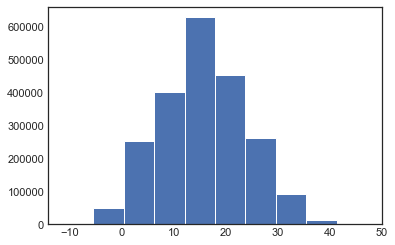

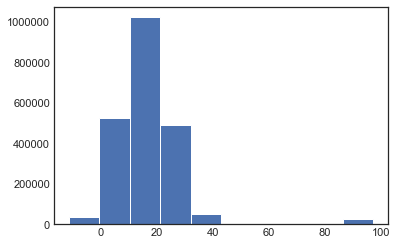

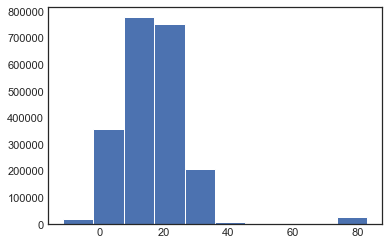

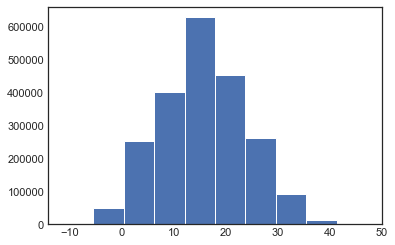

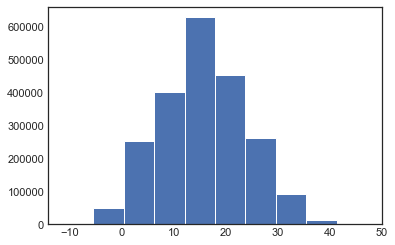

In [49]:
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    plt.hist(cont_data[col])

#### Histograms:

AT:  Air temperature is normally distributed, has a nice bell shape. 

Q: Photosynthetically active radiation (PAR) - bell shape shifted to the right. When I initially had fillna with 0 it was just a column at the 0 mark. 

Rh: Relative humdity - a boarder histogram that is similar to Q. 

SM: volumetric water content - it is a very even histogram 

ST: Soil temperature: follows a very similar pattern to AT. 

#### EDA Harvard Forest 

In [52]:
df['treatment'] = df['treatment'].apply({ 'G': 0, 'S': 1}.get)
df['treatment'] = df['treatment'].apply({ 'C': 0, 'A': 1, '3': 3, '5': 5}.get)

In [53]:
df["Rh"] = df.Rh.convert_objects(convert_numeric=True)
df["Q"] = df.Q.convert_objects(convert_numeric=True)
df["SM"] = df.SM.convert_objects(convert_numeric=True)
df["ST"] = df.ST.convert_objects(convert_numeric=True)
df["AT"] = df.AT.convert_objects(convert_numeric=True)

df["chamber"] = df.chamber.convert_objects(convert_numeric=True)
df["treatment"] = df.treatment.convert_objects(convert_numeric=True)
df["warming"] = df.warming.convert_objects(convert_numeric=True)

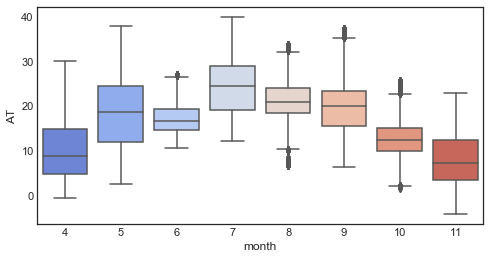

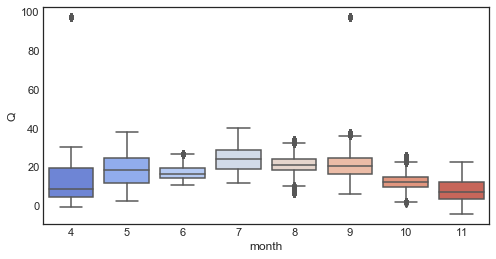

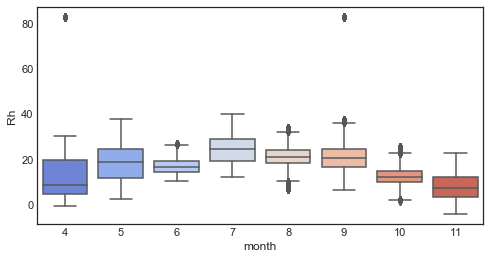

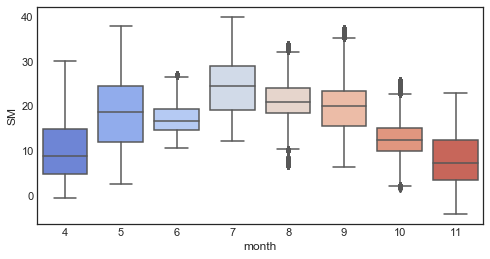

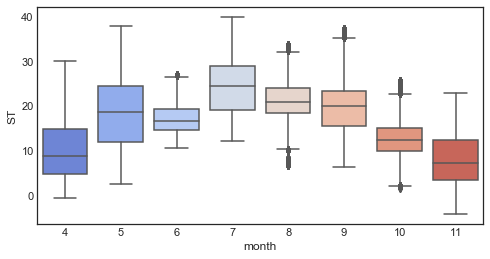

In [54]:
cont_hf=df.ix[:,'AT':'ST']

df['month']=df['month'].astype('category') #To convert target class into category

for i, col in enumerate(cont_hf.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=df['month'], y=col, data=df, palette="coolwarm")

### Harvard Forest - Environmental variables by Month - Barplots

AT:  Air temperature: Show a seasonal warming and cooling pattern. However, it months of May, July, August and November there is much more variability in air temperature. May, likely has spring rain and late season storms in Boston. July/August, could be influenced by hurricanes reaching up the north east. November,annomalous late season warming. 

Q: Photosynthetically active radiation (PAR) - The data seems very consisted, except for 2 annomalous data points in April and August. 

Rh: Relative humdity and ST: Soil temperature: follows a very similar pattern to AT. 

### Duke Forest EDA

In [55]:
df1['treatment'] = df1['treatment'].apply({ 'G': 0, 'S': 1}.get)
df1['treatment'] = df1['treatment'].apply({ 'C': 0, 'A': 1, '3': 3, '5': 5}.get)

In [56]:
df1["Rh"] = df1.Rh.convert_objects(convert_numeric=True)
df1["Q"] = df1.Q.convert_objects(convert_numeric=True)
df1["SM"] = df1.SM.convert_objects(convert_numeric=True)
df1["ST"] = df1.ST.convert_objects(convert_numeric=True)
df1["AT"] = df1.AT.convert_objects(convert_numeric=True)
df1["chamber"] = df1.chamber.convert_objects(convert_numeric=True)
df1["treatment"] = df1.treatment.convert_objects(convert_numeric=True)


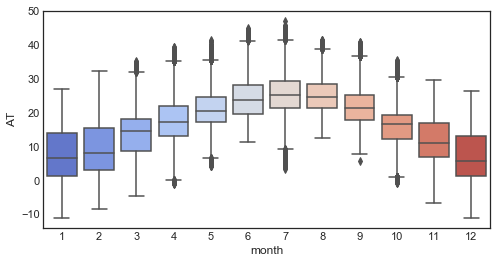

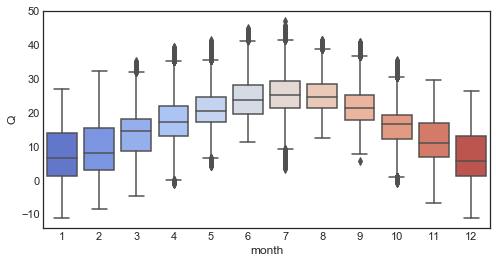

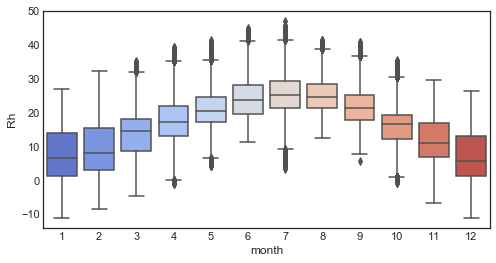

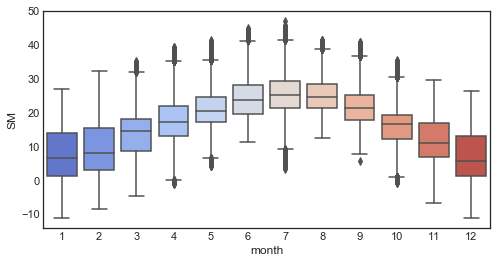

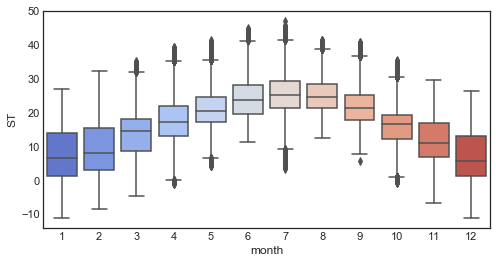

In [57]:
cont_df=df1.ix[:,'AT':'ST']

df1['month']=df1['month'].astype('category') #To convert target class into category

for i, col in enumerate(cont_df.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=df1['month'], y=col, data=df1, palette="coolwarm")

### Duke Forest - Environmental variables by Month - Barplots

All of the environmental variables for Duke follow the same pattern. There is a bit of concern that fillna with mean leveled out the data too much? Hard to tell. Looks a bit suspicious thou.  

### The entire dataset

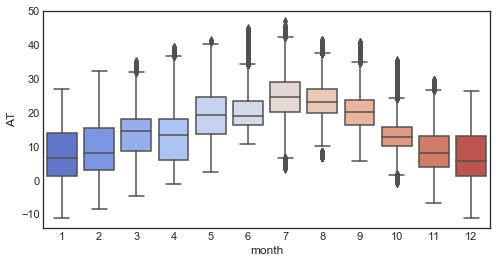

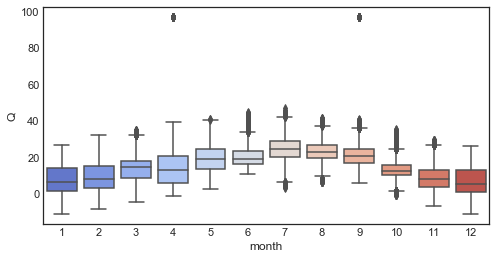

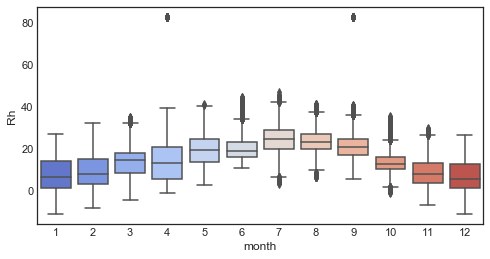

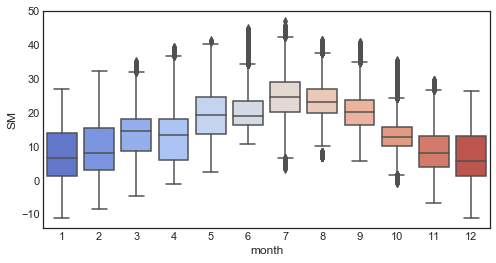

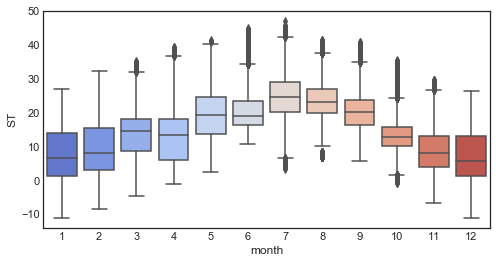

In [58]:
HfDf['month']=HfDf['month'].astype('category') #To convert target class into category

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=HfDf['month'], y=col, data=HfDf, palette="coolwarm")

#### Environmental variables by Month - Barplots

AT:  Air temperature: by combining the datasets does pull the AT down a little bit. This is Harvard forest. 

Q: Photosynthetically active radiation (PAR) - Two annolamous data points again at April and August, it is from the Harvard dataset. 

Rh: Relative humdity - Two annolamous data points again at April and August, it is from the Harvard dataset. 

SM and ST are very similar to AT. 

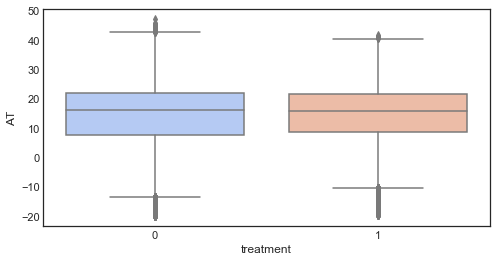

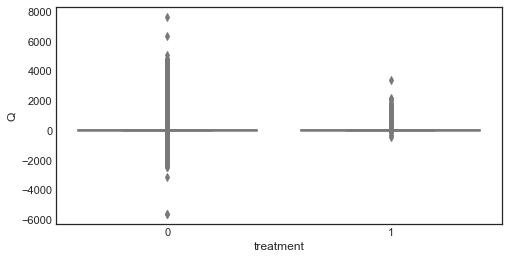

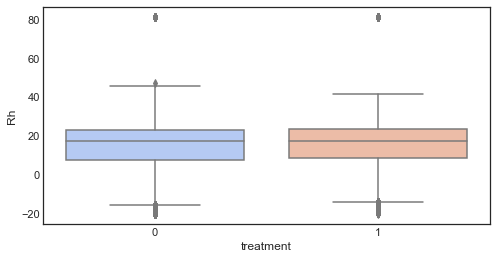

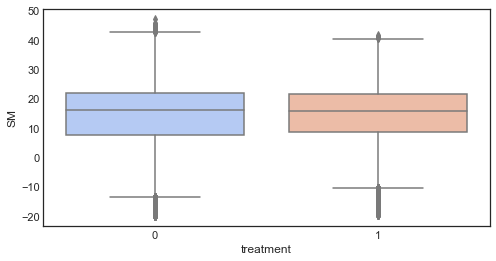

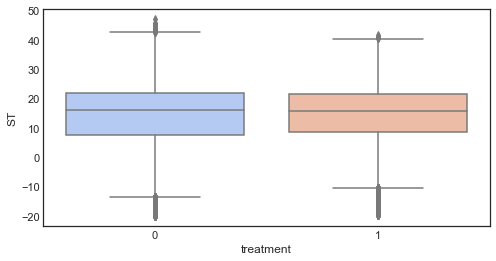

In [62]:
HfDf['treatment']=HfDf['treatment'].astype('category') #To convert target class into category

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=HfDf['treatment'], y=col, data=HfDf, palette="coolwarm")

### Comparing the treatment types: 
light treatment 
0 - G: chamber in open gap
1 - S: chamber under closed canopy

Overall they seem relatively similar. However, the ranges on the barplots are wider across all environmental variables for open gap instead of closed canopy. Q (PAR) had the most noticable effect, since Q is a measure of photosythensis having more light throught a gap in the forest makes sense. 

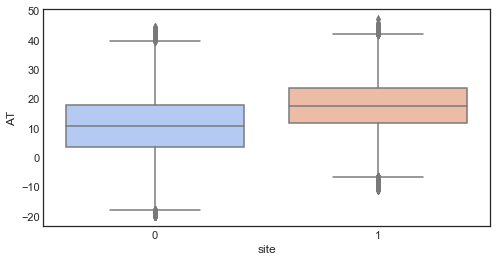

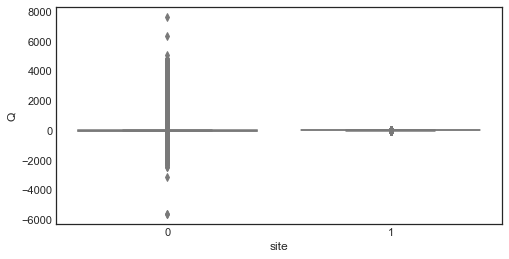

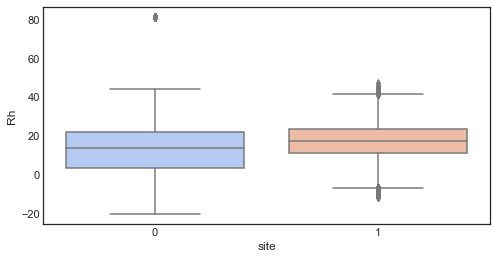

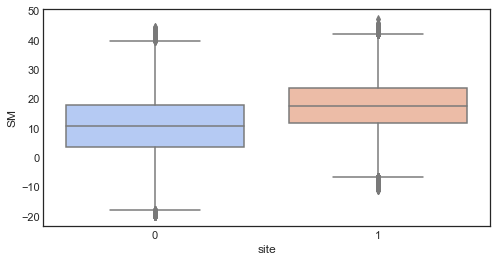

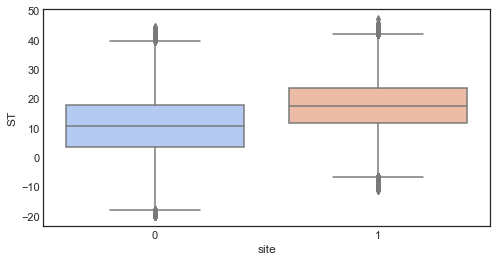

In [63]:
HfDf['site']=HfDf['site'].astype('category') #To convert target class into category

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=HfDf['site'], y=col, data=HfDf, palette="coolwarm")

### Comparing sites: 

**Harvard Forest 0**

The barplots are all slightly lower for harvard forest. Which makes sense since it is 700 miles due north of Duke forest. What is interesting is that the Q (PAR) is higher in Harvard Forest. Perphas there was clear-cut forest area, downed trees, and younger trees studied. 

**Duke Forest 1**

The barplots are all slightly higher for Duke forest. This make sense since it is more southernly in a warmer climate and more humid conditions. It is curious why the Q (PAR) was lower in the Duke forest. Was it due to instrumental readings? The time of year or month? Is the forest at Duke more dense and has less canopy gaps for light? 





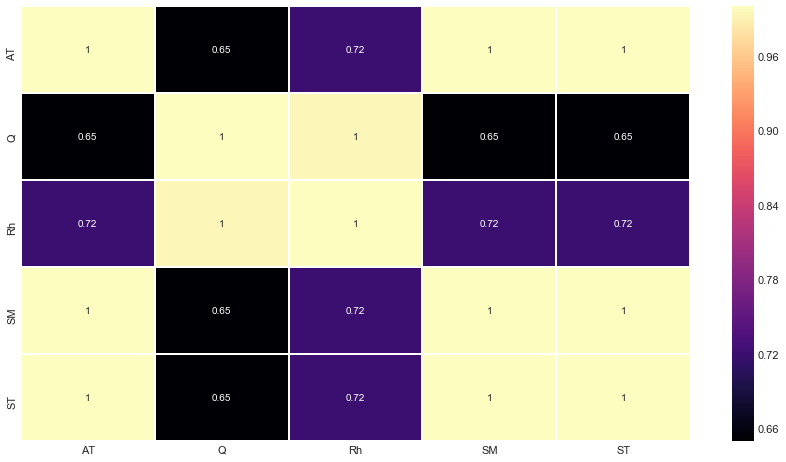

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

### Seaborn heatmap correlation 

I suspect that the 1 to 1 correlation is due to variance of adding mean values into the dataset. 

There is a relationship between AT (air temperature) and Q (PAR) as well as AT and Rh (Relative humdity)

# Supervised Learning 

In [60]:
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

from sklearn import linear_model
from sklearn import preprocessing
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [61]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

## Linear regression 

In [62]:
dmax = HfDf.groupby('month').max()
dmin = HfDf.groupby('month').min()
davg = HfDf.groupby('month').mean()

Plot of the monthly max of AT and Q 

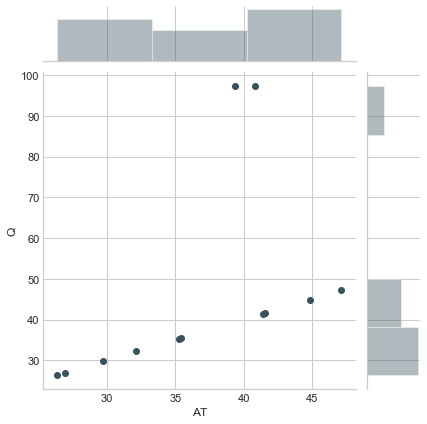

In [63]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='AT',y='Q',data=dmax) # Day with AT

Plot of monthly min of AT and Q

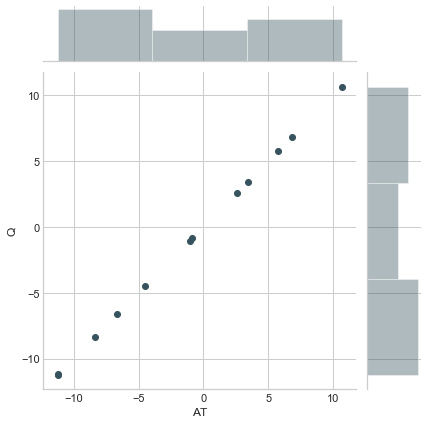

In [64]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='AT',y='Q',data=dmin) # Day with AT

Plot of monthly mean of AT and Q

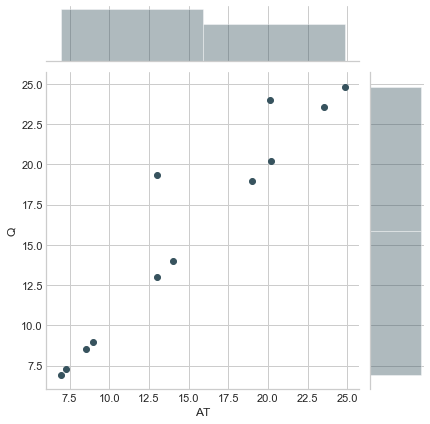

In [65]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='AT',y='Q',data=davg) # Day with AT

In all senarios of min, max, and mean there is a linear relationship between air temperature and par

              date  year month  day  site  chamber  treatment     AT      Q  \
750851  2010-04-30  2010     4   30     0        1          1 14.920 97.239   
751023  2010-04-21  2010     4   21     0        4          0 14.920 97.239   
751024  2010-04-21  2010     4   21     0        4          0 14.920 97.239   
751025  2010-04-21  2010     4   21     0        4          0 14.920 97.239   
751026  2010-04-21  2010     4   21     0        4          0 14.920 97.239   
751027  2010-04-21  2010     4   21     0        4          0 14.920 97.239   
751028  2010-04-21  2010     4   21     0        4          0 14.920 97.239   
751029  2010-04-21  2010     4   21     0        4          0 14.920 97.239   
751030  2010-04-21  2010     4   21     0        4          0 14.920 97.239   
751031  2010-04-21  2010     4   21     0        4          0 14.920 97.239   
751032  2010-04-21  2010     4   21     0        4          0 14.920 97.239   
751033  2010-04-21  2010     4   21     0        4  

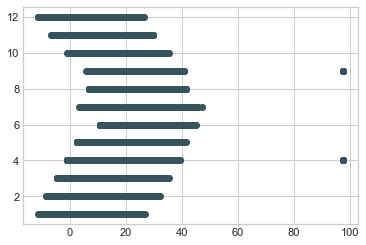

In [66]:
print(HfDf.loc[HfDf['Q']==max(HfDf['Q']),:])

plt.scatter(HfDf['Q'],HfDf['month'])
plt.show()

In [67]:
newdf = HfDf.loc[HfDf['Q']!=7643.000,:]

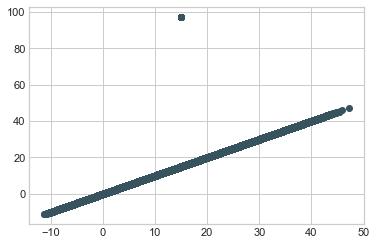

In [68]:
plt.scatter(newdf['AT'],newdf['Q'])
plt.show()

#### Seaborn pairplots using max, min, and mean for all the environmental variables

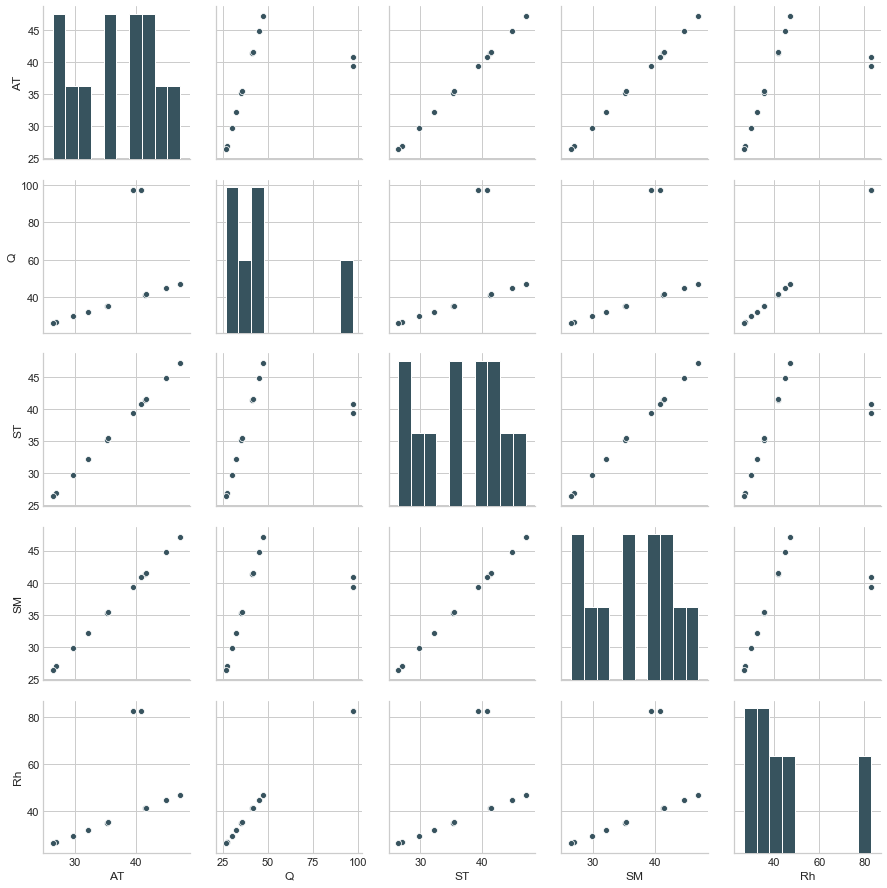

In [69]:
sns.pairplot(dmax[['AT', 'Q', 'ST', 'SM', 'Rh']]) #Max values 

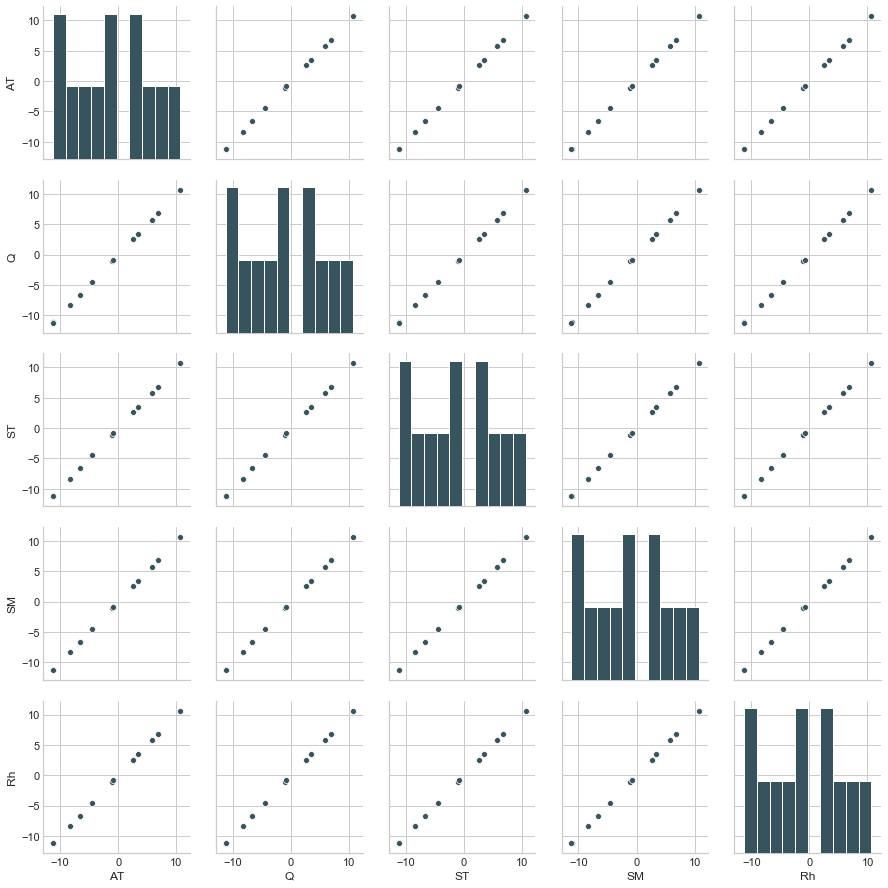

In [70]:
sns.pairplot(dmin[['AT', 'Q', 'ST', 'SM', 'Rh']]) #Min values 

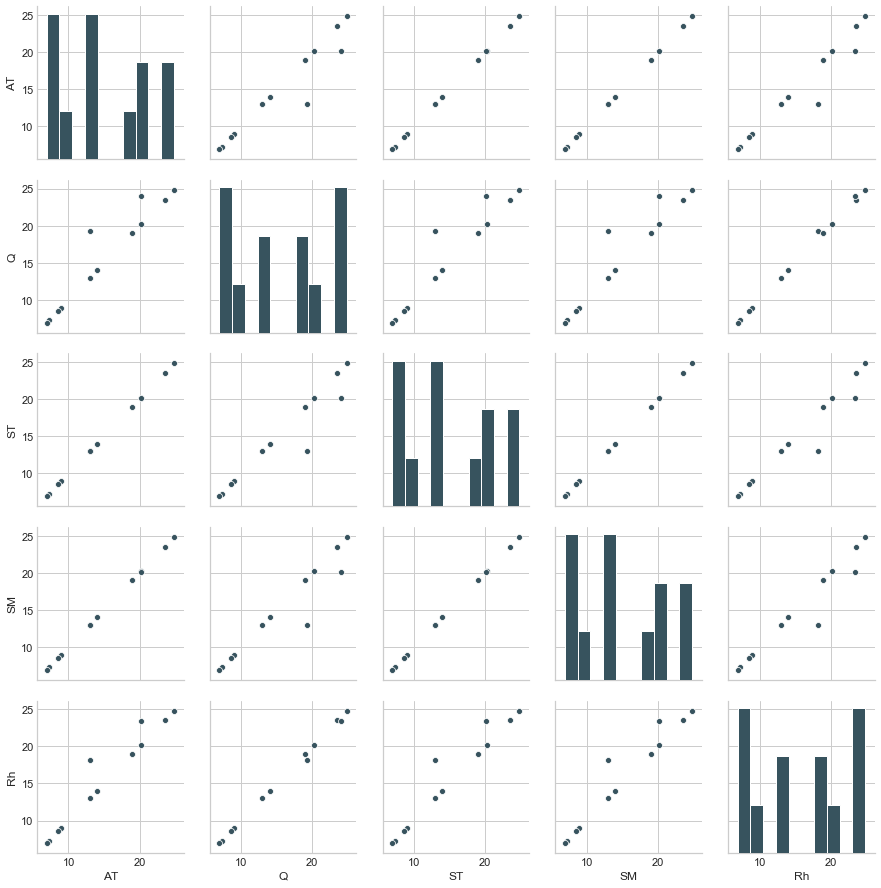

In [71]:
sns.pairplot(davg[['AT', 'Q', 'ST', 'SM', 'Rh']]) #Mean values

#### Linear regression 

Using Q (PAR) as the target variable (y). 

In [87]:
y = davg['Q']
X = davg[['AT', 'Rh']]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.2097018  1.2097018]


In [90]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

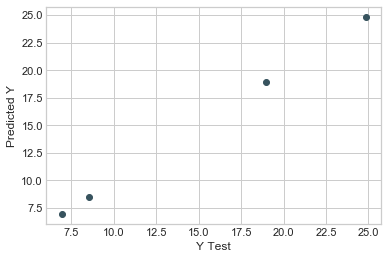

In [91]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Scatter plot of our y_test by predictions is not great. 

It does indicate that Q increases porportionally to AT and Rh. 

In [92]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9.414691248821327e-14
MSE: 1.059597967892863e-26
RMSE: 1.0293677515314257e-13


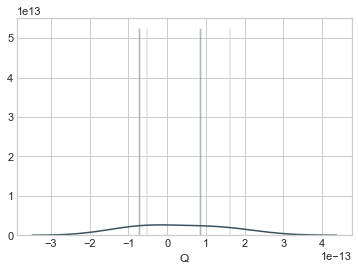

In [93]:
sns.distplot((y_test-predictions),bins=50);

In [94]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
AT,-0.210
Rh,1.210


Linear regression model shows a 1.210 coefficient with Rh. This may be due to the two outliers. 

# Logistic Regression 

In [95]:
HfDf.head(2)

,date,year,month,day,site,chamber,treatment,AT,Q,Rh,SM,ST,ppfd,CO2_uptake,CO2_release
0,2009-05-06,2009,5,6,1,1,0,24.227,24.227,24.227,24.227,24.227,20824023780193656832.000,True,False
1,2009-05-06,2009,5,6,1,2,0,24.513,24.513,24.513,24.513,24.513,21070428018388783104.000,True,False


Does the light treatment have an effect?

treatment: light treatment
0 G: chamber in open gap
1 S: chamber under closed canopy

In [98]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [99]:
from sklearn.model_selection import train_test_split

In [101]:
X = HfDf.ix[:, 'chamber':'ST'].drop(columns=['treatment'])
y = HfDf['treatment']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
predictions = logmodel.predict(X_test)

In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.84      0.65    370200
           1       0.51      0.18      0.27    341922

   micro avg       0.52      0.52      0.52    712122
   macro avg       0.52      0.51      0.46    712122
weighted avg       0.52      0.52      0.47    712122



In [108]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [109]:
kfold = KFold(n_splits=7, random_state=42)

In [110]:
result = cross_val_score(logmodel, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.4542956125438623


Does the light treatment have an effect?

Yes it does! 

treatment: light treatment
0 G: chamber in open gap - analyzing the entire dataset open gap in the forest performs better. Meaning that trees respond better to this treatment. 


1 S: chamber under closed canopy - Under closed canopy conditions both forest combined did not perform as well. Trees along the eastern coast need light. 

# Naive Bayes 

### Site - Forests

0 Harvard 
1 Duke 

In [117]:
data = HfDf.ix[:, 'AT':'ST']
target = HfDf['site']

In [118]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [119]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.6571529858267936
Testing on Sample: 0.6567720678701264


In [120]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
f1_score(target, y_pred, average='macro')  


0.4286899711147681

In [122]:
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79   1407177
           1       0.62      0.04      0.07    750768

   micro avg       0.66      0.66      0.66   2157945
   macro avg       0.64      0.51      0.43   2157945
weighted avg       0.64      0.66      0.54   2157945



Based on the data the Harvard Forest site is easier to predict then the Duke forest. This maybe due to many more data points. It also could be related to how chambers and treatments could be differnt enough in both forests. This clearly says these forest are different based on our environmental variables used. 

# Random Forest 

In [123]:
#Supervised Learning imports 

from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [124]:
df.head(5)

,Unnamed: 0,date,Species,Tag,Chamber,site,year,month,day,hour,chamber,treatment,warming,AT,Q,Rh,SM,ST,ppfd,CO2_uptake,CO2_release
0,0,2010-04-15,acru,1.000,S01_5,HF,2010,4,15,1,1,None,5.000,11.000,11.000,11.000,11.000,11.000,11.000,True,True
1,1,2010-04-15,acru,1.000,S01_5,HF,2010,4,15,2,1,None,5.000,11.040,11.040,11.040,11.040,11.040,11.040,True,False
2,2,2010-04-15,acru,1.000,S01_5,HF,2010,4,15,3,1,None,5.000,10.415,10.415,10.415,10.415,10.415,10.415,True,True
3,3,2010-04-15,acru,1.000,S01_5,HF,2010,4,15,4,1,None,5.000,9.820,9.820,9.820,9.820,9.820,9.820,False,True
4,4,2010-04-15,acru,1.000,S01_5,HF,2010,4,15,5,1,None,5.000,9.860,9.860,9.860,9.860,9.860,9.860,True,False


In [125]:
df.dtypes

Unnamed: 0              int64
date           datetime64[ns]
Species                object
Tag                   float64
Chamber                object
site                   object
year                    int64
month                category
day                     int64
hour                    int64
chamber                 int64
treatment              object
warming               float64
AT                    float64
Q                     float64
Rh                    float64
SM                    float64
ST                    float64
ppfd                   object
CO2_uptake               bool
CO2_release              bool
dtype: object

In [126]:
df.groupby('warming').size()

warming
3.000    371529
5.000    420708
dtype: int64

In [127]:
df.isnull().sum()

Unnamed: 0           0
date                 0
Species              0
Tag                  0
Chamber              0
site                 0
year                 0
month                0
day                  0
hour                 0
chamber              0
treatment      1407177
warming         614940
AT                   0
Q                    0
Rh                   0
SM                   0
ST                   0
ppfd                 0
CO2_uptake           0
CO2_release          0
dtype: int64

In [128]:
df['treatment'] = df['treatment'].apply({ 'G': 0, 'S': 1}.get)
df['treatment'] = df['treatment'].apply({ 'C': 0, 'A': 1, '3': 3, '5': 5}.get)

In [129]:
df["Rh"] = df.Rh.convert_objects(convert_numeric=True)
df["Q"] = df.Q.convert_objects(convert_numeric=True)
df["SM"] = df.SM.convert_objects(convert_numeric=True)
df["ST"] = df.ST.convert_objects(convert_numeric=True)
df["AT"] = df.AT.convert_objects(convert_numeric=True)

df["chamber"] = df.chamber.convert_objects(convert_numeric=True)
df["treatment"] = df.treatment.convert_objects(convert_numeric=True)
df["warming"] = df.warming.convert_objects(convert_numeric=True)

In [130]:
df.dtypes

Unnamed: 0              int64
date           datetime64[ns]
Species                object
Tag                   float64
Chamber                object
site                   object
year                    int64
month                category
day                     int64
hour                    int64
chamber                 int64
treatment              object
warming               float64
AT                    float64
Q                     float64
Rh                    float64
SM                    float64
ST                    float64
ppfd                   object
CO2_uptake               bool
CO2_release              bool
dtype: object

### Random Forest - Harvard Forest with tree species 

Too many missing values for treatment and warming - both needed to be dropped. 

In [132]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

X = df.ix[:, 'year':'ST'].drop(columns=['treatment', 'warming'])
Y = df['Species']

rfc = ensemble.RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.1,random_state=0)
train = rfc.fit(X_train, y_train)

rfc.fit(X_train, y_train)

# Apply to testing data
y_hat = rfc.predict(X_test)


print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))
print(classification_report(y_test, y_hat))

Training set score: 0.44117259224341254

Test set score: 0.42928410011512386
              precision    recall  f1-score   support

        acba       0.00      0.00      0.00       680
        acru       0.53      0.86      0.66     56089
        acsa       0.30      0.01      0.01      1438
        acun       0.00      0.00      0.00       154
        beal       0.20      0.20      0.20      3090
        bele       0.17      0.05      0.08      6651
        bepa       0.18      0.20      0.19      7270
        beun       0.29      0.61      0.39     10244
        cagl       0.00      0.00      0.00         6
        fagr       0.00      0.00      0.00       633
        fram       0.20      0.02      0.04      1171
        ilvo       0.00      0.00      0.00        32
        list       0.27      0.02      0.04      3102
        litu       0.00      0.00      0.00      4840
        magr       0.00      0.00      0.00      1218
        maun       0.00      0.00      0.00        64
    

Species: species code. Most ambiguous individuals died before they grew large enough for positive identification.
**Only including the highest values in discussion f1-scores**

acba: Acer barbatum, southern sugar maple

**acru: Acer rubrum, red maple - 0.66** It is a wide spread dicideous tree across north earstern US. And can handle a wide range of temperature. 

acsa: Acer saccharum, sugar maple
acun: Acer spp, ambiguous maple

**beal: Betula alleghaniensis, yellow birch - 0.20**  large and important lumber species of birch native to North-eastern North America. Its native range extends from Newfoundland to Prince Edward Island, Nova Scotia, New Brunswick, southern Quebec and Ontario, and the southeast corner of Manitoba in Canada, west to Minnesota, and south in the Appalachian Mountains to northern Georgia.[20] While its range extends as far south as Georgia, it is most abundant in the northern part of its range. In southern Pennsylvania, it is rare and generally only found along bodies of water in cool, mature woods, and it only occurs at high elevations from Maryland southward.[5][10] It grows in USDA zones 3-7.[5]
B. alleghaniensis prefers to grow in cooler conditions and is often found on north facing slopes, swamps, stream banks, and rich woods.[4][21] It does not grow well in dry regions or regions with hot summers and will often last only 30-50 years in such conditions. It grows soil pH ranging from 4-8.[9]


bele: Betula lenta, black birch
bepo: Betula populifolia, gray birch

**bepa: Betula papyrifera, paper birch - 0.19**
Betula papyrifera is mostly confined to Canada and the far northern United States. It is found in interior (var. humilus) and south-central (var. kenaica) Alaska and in all provinces and territories of Canada, except Nunavut, as well as the far northern continental United States. Isolated patches are found as far south as the Hudson Valley of New York and Pennsylvania, as well as Washington, D.C. High elevation stands are also in mountains to North Carolina, New Mexico, and Colorado. The most southerly stand in the Western United States is located in Long Canyon in the City of Boulder Open Space and Mountain Parks. This is an isolated Pleistocene relict that most likely reflects the southern reach of boreal vegetation into the area during the last Ice Age.[9]


beun: Betula spp, ambiguous birch
cagl: Carya glabra, pignut hickory
caov: Carya ovata, shagbark hickory
fagr: Fagus grandifolia, beech
fram: Fraxinus americana, white ash
ilvo: Ilix vomitoria, yaupon holly
list: Liquidambar styraciflua, sweetgum
litu: Liriodendron tulipifera, tulip tree; tulip poplar
magr: Magnolia grandiflora, southern magnolia
mavi: Magnolia virginiana, sweetbay magnolia
nysy: Nyssa sylvatica, black gum; sour gum
pipa: Pinus palustris, longleaf pine
pire: Pinus resinosa, red pine

**pist: Pinus strobus, white pine - 0.17**
Pinus strobus is found in the nearctic temperate broadleaf and mixed forests biome of eastern North America. It prefers well-drained or sandy soils and humid climates, but can also grow in boggy areas and rocky highlands. In mixed forests, this dominant tree towers over many others, including some of the large broadleaf hardwoods. It provides food and shelter for numerous forest birds, such as the red crossbill, and small mammals such as squirrels.
Eastern white pine forests originally covered much of north-central and north-eastern North America. Only one percent of the old-growth forests remain after the extensive logging operations of the 18th century to early 20th century.


pita: Pinus taeda, loblolly pine

**piun: Pinus spp, ambiguous pine - 0.20**


prse: Prunus serotina, black cherry
prpe: Prunus pensylvanica, pin cherry

**qual: Quercus alba, white oak - 0.15**
Q. alba is fairly tolerant of a variety of habitats, and may be found on ridges, in valleys, and in between, in dry and moist habitats, and in moderately acid and alkaline soils. It is mainly a lowland tree, but reaches altitudes of 5,249 ft in the Appalachian Mountains. It is often a component of the forest canopy in an oak-heath forest.[13][14]
Frequent fires in the Central Plains region of the United States prevented oak forests, including Q. alba, from expanding into the Midwest. However, a decrease in the frequency of these natural fires after European settlement caused rapid expansion of oak forests into the Great Plains, negatively affecting the natural prairie vegetation [15].

qufa: Quercus falcata, southern red oak; Spanish oak
quni: Quercus nigra, water oak
quph: Quercus phellos, willow oak
quru: Quercus rubra, red oak
quve: Quercus velutina, black oak
quun: Quercus spp, ambiguous oak
ulam: Ulmus americana, American elm
unkn: Unidentified tree


**It is interesting that the tree species with the highest f1-scores are all very northern tree species. It seems that these trees favor the warming under the experimental conditions.** More research is need to tease out what is going on here? 

In [134]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

X = HfDf.ix[:, 'year':'ST'].drop(columns=['treatment'])
Y = HfDf['treatment']

rfc = ensemble.RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.1,random_state=0)
train = rfc.fit(X_train, y_train)

rfc.fit(X_train, y_train)

# Apply to testing data
y_hat = rfc.predict(X_test)


print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))
print(classification_report(y_test, y_hat))

Training set score: 0.9754998326596813

Test set score: 0.838022196992516
              precision    recall  f1-score   support

           0       0.83      0.87      0.85    112174
           1       0.85      0.81      0.83    103621

   micro avg       0.84      0.84      0.84    215795
   macro avg       0.84      0.84      0.84    215795
weighted avg       0.84      0.84      0.84    215795



**Does the light treatment have an effect?**

treatment: light treatment
0 G: chamber in open gap
1 S: chamber under closed canopy

Random Forest shows that light treatment has an effect but the difference between treatments is not as extreme as Logistic Regression showed. 

# Unsupervised - PCA 

In [135]:
HfDf.head(3)

,date,year,month,day,site,chamber,treatment,AT,Q,Rh,SM,ST,ppfd,CO2_uptake,CO2_release
0,2009-05-06,2009,5,6,1,1,0,24.227,24.227,24.227,24.227,24.227,20824023780193656832.000,True,False
1,2009-05-06,2009,5,6,1,2,0,24.513,24.513,24.513,24.513,24.513,21070428018388783104.000,True,False
2,2009-05-06,2009,5,6,1,3,0,24.070,24.070,24.070,24.070,24.070,20689360992857600000.000,True,False


In [138]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(HfDf[['chamber', 'treatment', 'AT',
                                                    'Q', 'Rh', 'SM', 'ST']])
df_std = std_scale.transform(HfDf[['chamber', 'treatment', 'AT',
                                                    'Q', 'Rh', 'SM', 'ST']])

minmax_scale = preprocessing.MinMaxScaler().fit(HfDf[['chamber', 'treatment', 'AT',
                                                    'Q', 'Rh', 'SM', 'ST']])
df_minmax = minmax_scale.transform(HfDf[['chamber', 'treatment', 'AT',
                                                    'Q', 'Rh', 'SM', 'ST']])

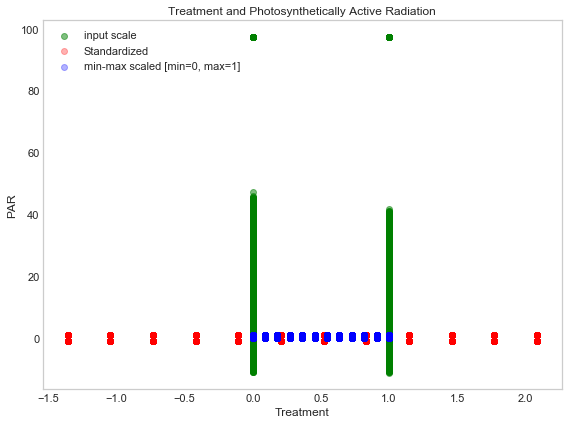

In [140]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(HfDf['treatment'], HfDf['Q'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized', alpha=0.3)
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Treatment and Photosynthetically Active Radiation')
    plt.xlabel('Treatment')
    plt.ylabel('PAR')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

#### PCA of Treatment and Q (PAR) 

It looks like a fieldgoal post. 

It does show a difference in green lines of Q between both treatments. 

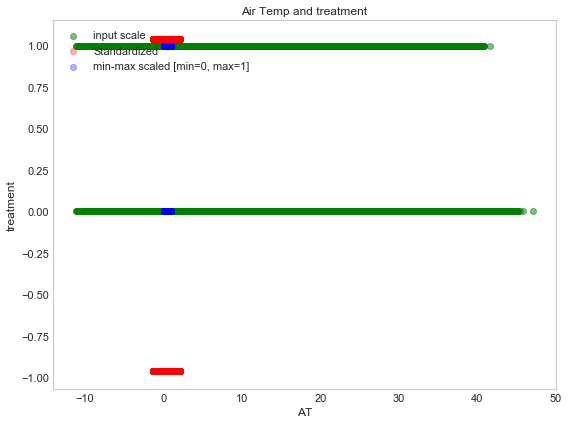

In [144]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(HfDf['AT'], HfDf['treatment'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized', alpha=0.3)
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Air Temp and treatment')
    plt.xlabel('AT')
    plt.ylabel('treatment')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

Not a great figure. But does show the differences in AT with treatment. 

In [145]:
HfDf.head(3)

,date,year,month,day,site,chamber,treatment,AT,Q,Rh,SM,ST,ppfd,CO2_uptake,CO2_release
0,2009-05-06,2009,5,6,1,1,0,24.227,24.227,24.227,24.227,24.227,20824023780193656832.000,True,False
1,2009-05-06,2009,5,6,1,2,0,24.513,24.513,24.513,24.513,24.513,21070428018388783104.000,True,False
2,2009-05-06,2009,5,6,1,3,0,24.070,24.070,24.070,24.070,24.070,20689360992857600000.000,True,False


In [164]:
trees3 = HfDf.drop(columns=['date', 'year', 'month','day', 'site', 'chamber', 'treatment', 'ppfd', 'CO2_uptake', 'CO2_release'])

In [165]:
trees3.head(1)

,AT,Q,Rh,SM,ST
0,24.227,24.227,24.227,24.227,24.227


In [166]:

X_forest = trees3.values[:,1:]
y_forest = trees3.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_forest, y_forest,
    test_size=0.90, random_state=12345)

In [167]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [168]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


# om standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

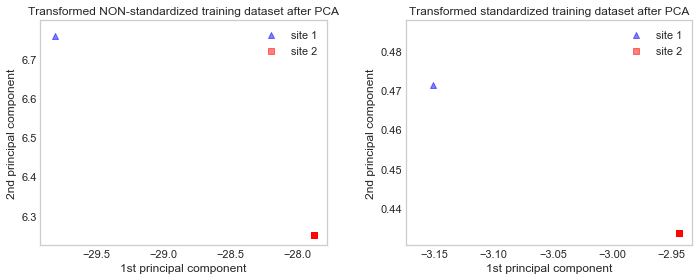

In [169]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,10), ('blue', 'red'), ('^', 's')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c,
        label='site %s' %l,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,10), ('blue', 'red'), ('^', 's')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c,
        label='site %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  

PCA does show a clear difference between site 1 and 2 (Harvard and Duke forests). 

# Time Series Machine Learning

In [170]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [171]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [261]:
df3.head(3)

,Unnamed: 0,date,Chamber,site,year,month,day,chamber,treatment,AT,Q,Rh,SM,ST,ppfd,CO2_uptake,CO2_release
0,0,2010-04-15,S01_5,HF,2010,4,15,1,S,11.000,11.000,11.000,11.000,11.000,11.000,True,True
1,1,2010-04-15,S01_5,HF,2010,4,15,1,S,11.040,11.040,11.040,11.040,11.040,11.040,True,False
2,2,2010-04-15,S01_5,HF,2010,4,15,1,S,10.415,10.415,10.415,10.415,10.415,10.415,True,True


In [263]:
ts1 = df3.drop(columns=['Unnamed: 0', 'Chamber', 'site', 'year', 'month','day', 'chamber', 'treatment', 'ppfd', 'CO2_uptake', 'CO2_release'])

In [264]:
ts1.head(1)

,date,AT,Q,Rh,SM,ST
0,2010-04-15,11.000,11.000,11.000,11.000,11.000


### Time Series for AT - Harvard Forest

In [265]:
from datetime import datetime
con=ts1['date']
ts1['date']=pd.to_datetime(ts1['date'])
ts1.set_index('date', inplace=True)
#check datatype of index
ts1.index

DatetimeIndex(['2010-04-15', '2010-04-15', '2010-04-15', '2010-04-15',
               '2010-04-15', '2010-04-15', '2010-04-15', '2010-04-15',
               '2010-04-15', '2010-04-15',
               ...
               '2010-11-29', '2010-11-29', '2010-11-29', '2010-11-29',
               '2010-11-29', '2010-11-29', '2010-11-29', '2010-11-29',
               '2010-11-29', '2010-11-29'],
              dtype='datetime64[ns]', name='date', length=1407177, freq=None)

In [231]:
ts=df.groupby(['date'], sort=True)['AT'].max()

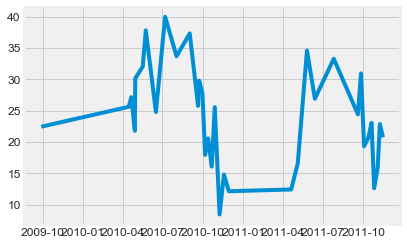

In [232]:
plt.plot(ts)

Time series plot of air temperature MAX in Harvard forest since 2009 to 2011. 

Max AT reached in 2010 at 40 C. 

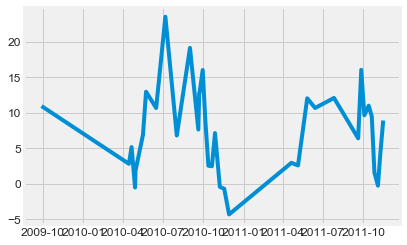

In [233]:
ts1=df.groupby(['date'], sort=True)['AT'].min()
plt.plot(ts1)

Time series plot of AT min. The min temperature recorded at 2011 at -4 C. 

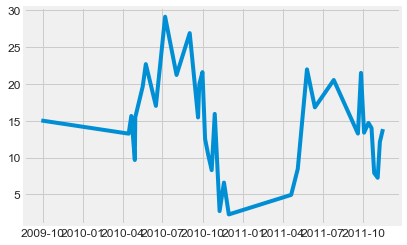

In [234]:
ts2=df.groupby(['date'], sort=True)['AT'].mean()
plt.plot(ts2)

Time series - AT mean temp

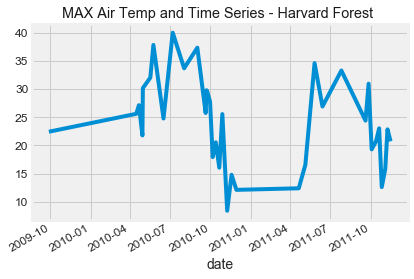

In [279]:
ts.plot()
plt.title('MAX Air Temp and Time Series - Harvard Forest ')
plt.show()

In [259]:
ts1.head(10)

date
2009-09-28   10.937
2010-04-15    2.823
2010-04-21    5.170
2010-04-29   -0.509
2010-04-30    1.847
2010-05-17    6.911
2010-05-24   12.953
2010-06-16   10.670
2010-07-07   23.497
2010-08-02    6.803
Name: AT, dtype: float64

In [182]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.AT, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                     AT   No. Observations:              1407177
Model:                     ARMA(1, 0)   Log Likelihood            -2818131.758
Method:                       css-mle   S.D. of innovations              1.793
Date:                Sat, 22 Jun 2019   AIC                        5636269.517
Time:                        18:41:51   BIC                        5636305.988
Sample:                             0   HQIC                       5636279.418
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9199      0.053    282.387      0.000      14.816      15.023
ar.L1.AT       0.9714      0.000   4852.586      0.000       0.971       0.972
                                    Roots           

In [183]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.AT, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                     AT   No. Observations:              1407177
Model:                     ARMA(0, 1)   Log Likelihood            -4079348.095
Method:                       css-mle   S.D. of innovations              4.393
Date:                Sat, 22 Jun 2019   AIC                        8158702.189
Time:                        18:42:56   BIC                        8158738.661
Sample:                             0   HQIC                       8158712.091
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9202      0.007   2167.485      0.000      14.907      14.934
ma.L1.AT       0.8588      0.000   2624.017      0.000       0.858       0.859
                                    Roots           

In [187]:
from statsmodels.tsa.arima_model import ARIMA
model_011 = ARIMA(df.AT, order=(0,1,1))
model_011_fit = model_011.fit()
print(model_011_fit.summary())
print('Residuals Description')
print(model_011_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                   D.AT   No. Observations:              1407176
Model:                 ARIMA(0, 1, 1)   Log Likelihood            -2818612.143
Method:                       css-mle   S.D. of innovations              1.793
Date:                Sat, 22 Jun 2019   AIC                        5637230.285
Time:                        18:53:15   BIC                        5637266.757
Sample:                             1   HQIC                       5637240.187
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.499e-06      0.002     -0.005      0.996      -0.003       0.003
ma.L1.D.AT     0.1052      0.001    139.441      0.000       0.104       0.107
                                    Roots           

Text(0.5,1,'Histogram of Residuals')

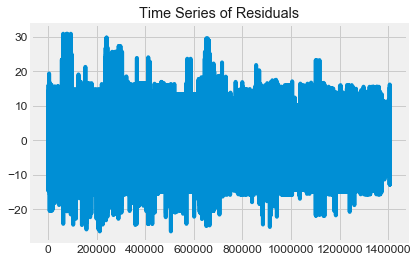

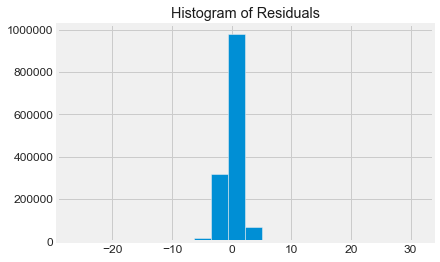

In [188]:
residuals = pd.DataFrame(model_011_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

The residuals for the Harvard forest show a slight up-tick in the AT temperature in the past 3 years. It would be interesting to see that past 7 years to get deeper insights. 

## Duke Forest Time series 

In [268]:
df1.head(5)

,site,year,times,month,day,JD,JD2009,dayFraction,chamber,treatment,AT,Q,Rh,SM,ST,date,CO2_uptake,CO2_release,ppfd
0,DF,2009,125.540,5,6,-240,125,0.540,1,None,24.227,24.227,24.227,24.227,24.227,2009-05-06,True,False,20824023780193656832.000
1,DF,2009,125.540,5,6,-240,125,0.540,2,None,24.513,24.513,24.513,24.513,24.513,2009-05-06,True,False,21070428018388783104.000
2,DF,2009,125.540,5,6,-240,125,0.540,3,None,24.070,24.070,24.070,24.070,24.070,2009-05-06,True,False,20689360992857600000.000
3,DF,2009,125.540,5,6,-240,125,0.540,4,None,24.443,24.443,24.443,24.443,24.443,2009-05-06,True,False,21010259540220940288.000
4,DF,2009,125.540,5,6,-240,125,0.540,5,None,24.305,24.305,24.305,24.305,24.305,2009-05-06,True,False,20891355169563934720.000


In [270]:
tsf = df1.drop(columns=['site', 'year', 'times', 'month','day', 'JD', 'JD2009', 'ppfd', 'CO2_uptake', 'CO2_release', 'dayFraction', 'chamber', 'treatment'])

In [271]:
tsf.head(3)

,AT,Q,Rh,SM,ST,date
0,24.227,24.227,24.227,24.227,24.227,2009-05-06
1,24.513,24.513,24.513,24.513,24.513,2009-05-06
2,24.070,24.070,24.070,24.070,24.070,2009-05-06


In [273]:
tsf = tsf[['date', 'AT', 'Q', 'Rh', 'SM', 'ST']]

In [274]:
from datetime import datetime
con=tsf['date']
tsf['date']=pd.to_datetime(tsf['date'])
tsf.set_index('date', inplace=True)
#check datatype of index
tsf.index

DatetimeIndex(['2009-05-06', '2009-05-06', '2009-05-06', '2009-05-06',
               '2009-05-06', '2009-05-06', '2009-05-06', '2009-05-06',
               '2009-05-06', '2009-05-06',
               ...
               '2012-11-27', '2012-11-27', '2012-11-27', '2012-11-27',
               '2012-11-27', '2012-11-27', '2012-11-27', '2012-11-27',
               '2012-11-27', '2012-11-27'],
              dtype='datetime64[ns]', name='date', length=750768, freq=None)

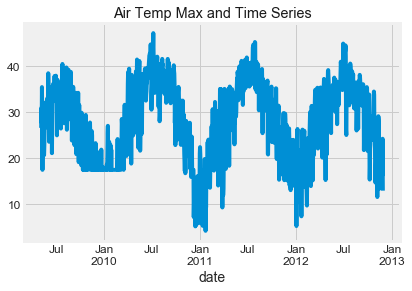

In [277]:
tsf1=tsf.groupby(['date'], sort=True)['AT'].max()

tsf1.plot()
plt.title('Air Temp Max and Time Series')
plt.show()

The max air temperature in Duke forest was nearly 50 C in July 2010. 

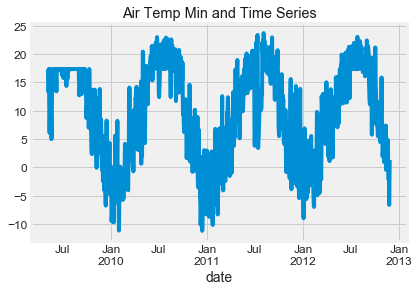

In [278]:
tsf2=tsf.groupby(['date'], sort=True)['AT'].min()

tsf2.plot()
plt.title('Air Temp Min and Time Series')
plt.show()

Duke forest min air temperature in Jan 2010 was below -10 C. 

In [301]:
tsf.head(3)

,AT,Q,Rh,SM,ST
date,,,,,
2009-05-06,24.227,24.227,24.227,24.227,24.227
2009-05-06,24.513,24.513,24.513,24.513,24.513
2009-05-06,24.070,24.070,24.070,24.070,24.070


In [313]:
df1.head(3)

,site,year,times,month,day,JD,JD2009,dayFraction,chamber,treatment,AT,Q,Rh,SM,ST,date,CO2_uptake,CO2_release,ppfd
0,DF,2009,125.540,5,6,-240,125,0.540,1,None,24.227,24.227,24.227,24.227,24.227,2009-05-06,True,False,20824023780193656832.000
1,DF,2009,125.540,5,6,-240,125,0.540,2,None,24.513,24.513,24.513,24.513,24.513,2009-05-06,True,False,21070428018388783104.000
2,DF,2009,125.540,5,6,-240,125,0.540,3,None,24.070,24.070,24.070,24.070,24.070,2009-05-06,True,False,20689360992857600000.000


In [326]:
tsf13 = df1.drop(columns=['site', 'times', 'month', 'date','day', 'JD', 'JD2009', 'ppfd', 'CO2_uptake', 'CO2_release', 'dayFraction', 'chamber', 'treatment'])

In [327]:
tsf13.head(3)

,year,AT,Q,Rh,SM,ST
0,2009,24.227,24.227,24.227,24.227,24.227
1,2009,24.513,24.513,24.513,24.513,24.513
2,2009,24.070,24.070,24.070,24.070,24.070


In [283]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(tsf.AT, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                     AT   No. Observations:               750768
Model:                     ARMA(0, 1)   Log Likelihood            -2375560.272
Method:                       css-mle   S.D. of innovations              5.727
Date:                Sat, 22 Jun 2019   AIC                        4751126.544
Time:                        20:20:23   BIC                        4751161.130
Sample:                             0   HQIC                       4751136.173
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3824      0.012   1495.864      0.000      17.360      17.405
ma.L1.AT       0.7580      0.000   1550.674      0.000       0.757       0.759
                                    Roots           

In [284]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(tsf.AT, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                   D.AT   No. Observations:               750767
Model:                 ARIMA(0, 1, 0)   Log Likelihood            -1934356.480
Method:                           css   S.D. of innovations              3.182
Date:                Sat, 22 Jun 2019   AIC                        3868716.961
Time:                        20:21:19   BIC                        3868740.018
Sample:                             1   HQIC                       3868723.380
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.245e-05      0.004     -0.006      0.995      -0.007       0.007
Residuals Description
count   750767.000
mean        -0.000
std          3.182
min        -28.309
25%         -1.236
50%          0

In [285]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(tsf.AT, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                     AT   No. Observations:               750768
Model:                     ARMA(1, 0)   Log Likelihood            -1922405.413
Method:                       css-mle   S.D. of innovations              3.132
Date:                Sat, 22 Jun 2019   AIC                        3844816.826
Time:                        20:21:55   BIC                        3844851.412
Sample:                             0   HQIC                       3844826.455
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3824      0.058    301.478      0.000      17.269      17.495
ar.L1.AT       0.9373      0.000   2330.469      0.000       0.937       0.938
                                    Roots           

In [332]:
from statsmodels.tsa.arima_model import ARIMA
model_011 = ARIMA(tsf.AT, order=(0,1,1))
model_011_fit = model_011.fit()
print(model_011_fit.summary())
print('Residuals Description')
print(model_011_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                   D.AT   No. Observations:               750767
Model:                 ARIMA(0, 1, 1)   Log Likelihood            -1911566.464
Method:                       css-mle   S.D. of innovations              3.087
Date:                Sat, 22 Jun 2019   AIC                        3823138.928
Time:                        21:37:25   BIC                        3823173.515
Sample:                             1   HQIC                       3823148.557
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.23e-05      0.002     -0.010      0.992      -0.004       0.004
ma.L1.D.AT    -0.3896      0.002   -202.773      0.000      -0.393      -0.386
                                    Roots           

Text(0.5,1,'Histogram of Residuals')

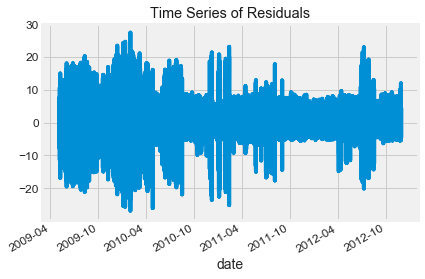

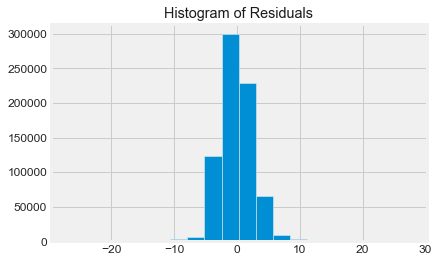

In [333]:
residuals = pd.DataFrame(model_011_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

Within a 3-year span of the residual for the Duke forest indicate in 2012 tigher residuals or less variance. It would be interesting to see the last 7 years of environmental data to see if the AT ticked furture upward. 